In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
income=np.array([10,12,15,19,23,32,44])
age=np.array([24,26,27,29,35,36,38])
df1=pd.DataFrame(income)
df2=pd.DataFrame(age)


In [12]:
df=pd.concat([df1,df2],axis=1)

In [13]:
df.columns=["income","age"]

In [14]:
df

,income,age
0,10,24
1,12,26
2,15,27
3,19,29
4,23,35
5,32,36
6,44,38


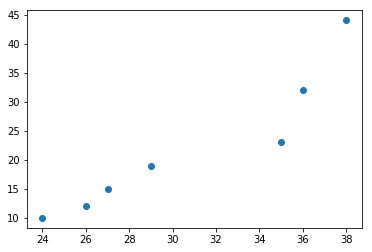

In [15]:
plt.scatter(df.age,df.income)
plt.show()

In [14]:
avg=np.average(df.income)
tss=0
for i in  df.income:
    tss+=(i-avg)**2
    
print(tss) 


886.8571428571429


In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
linreg=LinearRegression() # Prepare the LR Object

In [25]:
  
linreg.fit(pd.DataFrame(df.age),df.income)           # X should be Datafram and Y should be Series


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [26]:
# B1 - slope of the line - The type is an array because the coeff can be multiple based on number of independent varialbles
linreg.coef_             # age increases by 1 year income increases by 2.05

array([2.05140187])

In [28]:
linreg.intercept_        # B0 intercept of the line

-40.864485981308434

In [30]:
# Final Equation of the Line
#income=linreg.intercept_ +linreg.coef_ * age

In [32]:
# to get the predicitons on the values of age
# use the above equation and multiply the values of age with the values of B0 and B1
# OR Use the below 

linreg.predict(pd.DataFrame(df.age))

array([ 8.36915888, 12.47196262, 14.52336449, 18.62616822, 30.93457944,
       32.98598131, 37.08878505])

In [36]:
df["Predicted_Income"]=linreg.predict(pd.DataFrame(df.age))

In [37]:
df

,income,age,Predicted_Income
0,10,24,8.369159
1,12,26,12.471963
2,15,27,14.523364
3,19,29,18.626168
4,23,35,30.934579
5,32,36,32.985981
6,44,38,37.088785


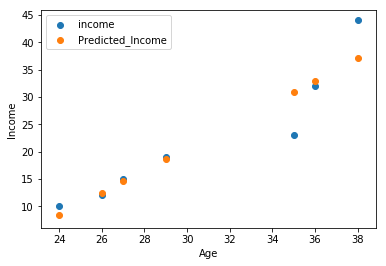

In [42]:
plt.scatter(df.age,df.income)
plt.scatter(df.age,df.Predicted_Income)
plt.xlabel("Age")
plt.ylabel("Income")
plt.legend()
plt.show()

In [54]:
sse_1=0
y=0
sse_1=(df.income-df.Predicted_Income)**2
sse=sum(sse_1)
sse


#for i in df.income:
#    sse+=(i-df.Predicted_Income[y])**2
#    y=y+1
#

114.94392523364485

In [45]:
tss

886.8571428571429

In [47]:
rsquare=1-(sse/tss)
rsquare

0.8703918368821659

In [53]:
import math
RMSE=math.sqrt(sse/len(df))
RMSE

4.0522291084862845

In [59]:
mape=(sum(np.abs((df.Predicted_Income - df.income)/df.income)))/len(df)
mape

0.11239029793231935

In [62]:
data=pd.read_csv("USA_Housing.csv")
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [66]:
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.5+ KB


In [67]:
data.Address.count()


5000

In [89]:
data.nunique()

Avg. Area Income                5000
Avg. Area House Age             5000
Avg. Area Number of Rooms       5000
Avg. Area Number of Bedrooms     255
Area Population                 5000
Price                           5000
Address                         5000
dtype: int64

In [90]:
data.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [71]:
data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


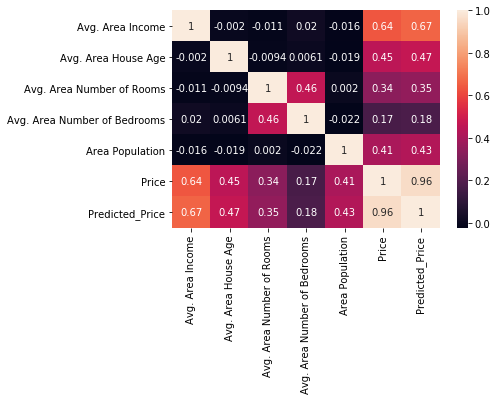

In [178]:
sns.heatmap(data.corr(),annot=True)

In [168]:
linreg=LinearRegression()
linreg.fit(pd.DataFrame(data.iloc[:,[0,1,2,3,4]]),data.Price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [169]:
linreg.coef_ 


array([2.15780494e+01, 1.65637027e+05, 1.20659949e+05, 1.65113905e+03,
       1.52007439e+01])

In [170]:
linreg.intercept_  

-2637299.0333281276

In [171]:
data["Predicted_Price"]=linreg.predict(pd.DataFrame(data.iloc[:,[0,1,2,3,4]]))

In [172]:
tss=sum((data.Price-np.mean(data.Price))**2)
tss

623335598953005.4

In [173]:
sse=sum((data.Price-data.Predicted_Price)**2)
sse

51098671566265.164

In [177]:
Rsquare = 1 - (sse/tss)
Rsquare

0.9180238195089551

In [175]:
mape=(sum(np.abs((data.Predicted_Price - data.Price)/data.Price)))/len(data)
mape

0.07624185208181675

# LGD Data

In [187]:
data=pd.read_csv("LGD_DATA.csv")
data.head()

,Ac_No,Age,Years of Experience,Number of Vehicles,Gender,Married,Losses in Thousands
0,150024,24,5,1,M,Married,203.319595
1,144880,31,10,1,F,Single,402.197302
2,133742,56,37,1,M,Married,553.132096
3,151282,52,31,1,F,Married,292.430579
4,174407,20,3,1,M,Single,246.540576


In [188]:
newdata=pd.get_dummies(data,drop_first=True) # drop first Categorical data and create dummy variable
newdata.head()

,Ac_No,Age,Years of Experience,Number of Vehicles,Losses in Thousands,Gender_M,Married_Single
0,150024,24,5,1,203.319595,1,0
1,144880,31,10,1,402.197302,0,1
2,133742,56,37,1,553.132096,1,0
3,151282,52,31,1,292.430579,0,0
4,174407,20,3,1,246.540576,1,1


In [189]:
del(newdata["Ac_No"]) # remove account number because it is unique for every person and we cannot infer any info from it


In [210]:
newdata.head()

,Age,Years of Experience,Number of Vehicles,Losses in Thousands,Gender_M,Married_Single
0,24,5,1,203.319595,1,0
1,31,10,1,402.197302,0,1
2,56,37,1,553.132096,1,0
3,52,31,1,292.430579,0,0
4,20,3,1,246.540576,1,1


In [191]:
linreg=LinearRegression()

In [196]:
linreg.fit(pd.DataFrame(newdata.iloc[:,[0,1,2,4,5]]),newdata["Losses in Thousands"])  

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [198]:
linreg.coef_ 

array([ -3.80823766,  -2.43254505,  -2.69086413,  93.8563901 ,
       134.99809835])

In [199]:
linreg.intercept_  

502.9204833236437

In [203]:
data["Predicted_Losses"]=linreg.predict(pd.DataFrame(newdata.iloc[:,[0,1,2,4,5]]))
data.head()

,Ac_No,Age,Years of Experience,Number of Vehicles,Gender,Married,Losses in Thousands,Predicted_Losses
0,150024,24,5,1,M,Married,203.319595,490.525580
1,144880,31,10,1,F,Single,402.197302,492.846900
2,133742,56,37,1,M,Married,553.132096,290.820534
3,151282,52,31,1,F,Married,292.430579,226.792364
4,174407,20,3,1,M,Single,246.540576,645.621719


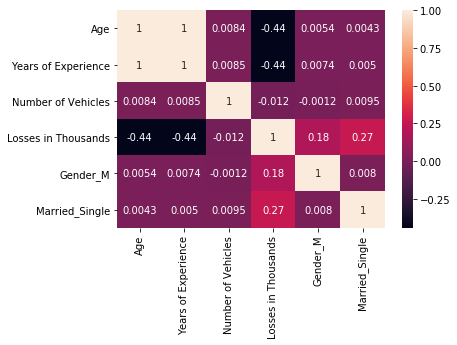

In [206]:
sns.heatmap(newdata.corr(),annot=True)
